# 5%min

In [10]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
from downloader import Downloader
from datetime import datetime, timedelta
importlib.reload(m)
dl = Downloader()

In [612]:
df = dl.get_timeseries_data("NKNUSDT", span="m5", past=False, full=False, timeindex=True)

In [613]:
df = df.iloc[-80000:]

In [614]:
index = df[df.high>df.low*1.05].index

In [615]:
df_ = df.loc[index[-1]-timedelta(minutes=10):index[-1]]

In [616]:
df_

,open,high,low,close,volume
timestamp,,,,,
2022-01-30 23:25:00,0.2081,0.2081,0.2068,0.2072,2989.0
2022-01-30 23:30:00,0.2071,0.2086,0.2068,0.2085,62214.0
2022-01-30 23:35:00,0.2083,0.2196,0.2080,0.2103,706639.0


In [617]:
((df_/df_.shift()).dropna().volume > 1.3).all()

True

In [618]:
new = []
for i in index:
    try:
        df__ = df.loc[i-timedelta(minutes=10):i+timedelta(minutes=5)]
        df_ = df__.iloc[:-1]
    except:
        continue
    w = (df_.high-df_.low).is_monotonic_increasing
    v = df_.volume.is_monotonic_increasing
    v1 = ((df_/df_.shift()).dropna().volume > 1.1).all()
    g = df_.close.is_monotonic_increasing
    v2 = df__.volume[-1]<df_.volume.mean()
    g1 = df__.close[-1]<df_.close[-1]
    if w and v and g and v1 and v2 and g1: new.append(i+timedelta(minutes=5))
    

In [619]:
df__.volume.mean()

216985.0

In [620]:
len(new)

8

In [621]:
def analyze(df, index, tp, sl, long=True):
    gains = []
    prev = index[0]-timedelta(days=30)
    for i in index:
        if i<prev: continue
        try:
            prev = i+timedelta(minutes=120)
            df_ = df.loc[i:prev]
            start = df_.close[0]
            df_ = df_.iloc[1:]
            try: hi = df_[df_['high'].gt(start*tp)].index[0]
            except: hi = None
                    
            try: lo = df_[df_['low'].lt(start*sl)].index[0]
            except: lo = None
            
            if hi is None and lo is None:
                close = (df_.close[-1]-start)/start
                gains.append(close)
            elif hi is None:
                gains.append(sl-1)
            elif lo is None:
                gains.append(tp-1)
            else:
                if long: gains.append(sl-1) if lo<=hi else gains.append(tp-1)
                else: gains.append(sl-1) if lo<hi else gains.append(tp-1)
        except:
            gains.append(0)
    gains = list(map(lambda x: round(x, 4), gains))
    return gains if long else list(map(lambda x: -x, gains))

In [622]:
gains = analyze(df, new, 12, 0.0, long=False)

<AxesSubplot:>

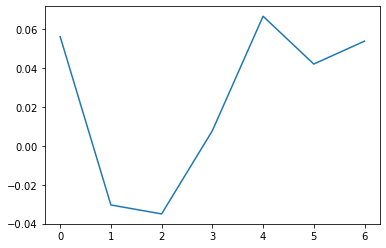

In [623]:
pd.Series(gains).cumsum().plot()

In [611]:
new

[Timestamp('2021-07-13 18:45:00'),
 Timestamp('2021-07-13 19:55:00'),
 Timestamp('2021-07-13 20:15:00'),
 Timestamp('2021-08-01 20:10:00'),
 Timestamp('2021-09-20 17:05:00'),
 Timestamp('2021-12-09 13:20:00'),
 Timestamp('2021-12-25 02:50:00'),
 Timestamp('2021-12-25 12:50:00'),
 Timestamp('2022-01-21 21:55:00')]

In [186]:
i = -4

<AxesSubplot:xlabel='timestamp'>

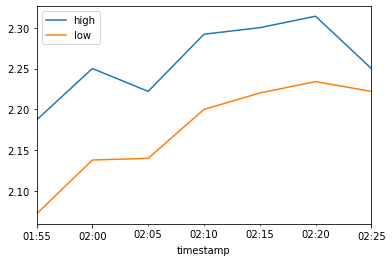

In [187]:
i += 1
df.loc[index[i]:index[i]+timedelta(minutes=30)].drop(['volume', 'open', 'close'], axis=1).plot()

In [114]:
i

7

In [53]:
df_[df_['close'].gt(0.195)].index[0]

IndexError: index 0 is out of bounds for axis 0 with size 0